# 뉴스 트렌드 vs 베스트셀러 상관관계 분석 (v3)

---

## 분석 접근 방법론

### 1. 바이럴 지수 설계

#### 구성 요소

| 요소 | 가중치 | 계산 방법 | 측정 목적 |
|------|--------|----------|----------|
| **MoM (전월대비)** | 50% | (당월 - 전월) / 전월 × 100 | 단기 급등/급락 감지 |
| **MA편차 (이동평균)** | 30% | (당월 - 3개월MA) / 3개월MA × 100 | 추세 대비 이탈 감지 |
| **Z-Score (표준화)** | 20% | (당월 - 평균) / 표준편차 | 전체 기간 대비 상대적 위치 |

```
바이럴 지수 = MoM × 0.5 + MA편차 × 0.3 + Z-Score × 20 × 0.2
```

#### 선택 이유

1. **다차원적 트렌드 포착**
   - MoM만 사용 시: 일시적 급등만 감지, 지속적 상승 놓침
   - MA편차만 사용 시: 추세 변화에 둔감
   - Z-Score만 사용 시: 절대적 수준만 반영, 변화 방향 놓침
   - **세 지표 조합으로 단기 급등 + 추세 이탈 + 상대적 위치 모두 반영**

2. **가중치 설정 근거**
   - MoM(50%): 뉴스는 최신성이 중요, 전월 대비 변화가 핵심
   - MA편차(30%): 단기 노이즈 제거, 의미있는 추세 변화 포착
   - Z-Score(20%): 보조 지표로 전체 기간 대비 맥락 제공

#### 장점과 단점

| 장점 | 단점 |
|------|------|
| 단일 지표보다 다양한 관점 반영 | 가중치 선택의 임의성 (50/30/20) |
| 급등과 지속적 상승 모두 감지 | 복합 지표라 직관적 해석 어려움 |
| 이상치에 상대적으로 강건 | 첫 1~2개월은 MA 계산 불완전 |
| 카테고리 간 비교 가능 | 최적 가중치는 사후 검증 필요 |

#### 대안적 접근법

| 대안 | 장점 | 본 분석에서 미채택 이유 |
|------|------|----------------------|
| 단순 기사 수 | 직관적 해석 | 카테고리 간 절대량 차이가 커서 비교 어려움 |
| 점유율 변화 (%p) | 가중치 논쟁 회피 | 절대량 변화 정보 손실 |
| 전년동월비 (YoY) | 계절성 통제 | 1년 데이터로 계산 불가 |

---

### 2. 상관계수 선택: 왜 Spearman인가?

| 구분 | Pearson 상관계수 | Spearman 상관계수 |
|------|-----------------|------------------|
| **측정 대상** | 선형 관계 | 단조 관계 (순위 기반) |
| **전제 조건** | 정규분포, 등분산성 | 없음 (비모수적) |
| **이상치 민감도** | 높음 | 낮음 (강건함) |
| **표본 크기** | 큰 표본 권장 | 작은 표본에서도 유효 |

#### Spearman 상관계수를 선택한 이유

1. **작은 표본 크기 (n=12)**
   - 12개월 데이터로 정규분포 가정이 어려움
   - Spearman은 비모수 검정으로 분포 가정 불필요

2. **이상치 영향 최소화**
   - 바이럴 지수와 베스트셀러 가중합 모두 특정 월에 급등/급락 가능
   - 순위 기반 Spearman이 극단값에 강건함

3. **비선형 단조 관계 탐지**
   - "뉴스 증가 → 도서 판매 증가"의 관계가 반드시 선형일 필요 없음
   - Spearman은 단조 증가/감소 관계도 탐지

4. **해석 용이성**
   - Spearman r = 순위의 일치도
   - "뉴스 바이럴이 높은 달에 베스트셀러 가중합도 높은가?"에 직관적 답변

---

### 3. 시차(Lag) 분석 방법

```
뉴스 바이럴 (t월) → 베스트셀러 (t + Lag월)
```

| Lag | 의미 | 해석 |
|-----|------|------|
| 0개월 | 동시 반응 | 뉴스와 도서 구매가 같은 달에 함께 움직임 |
| 1개월 | 선행 지표 | 뉴스가 도서 구매를 1개월 앞서 예측 |
| 2~3개월 | 지연 반응 | 뉴스 → 관심 증가 → 도서 탐색 → 구매까지 시간 소요 |

---

### 4. 유의성 기준

| 기준 | p-value | 표기 | 해석 |
|------|---------|------|------|
| 강한 유의 | p < 0.01 | *** | 매우 유의함 |
| 유의 | p < 0.05 | ** | 통계적으로 유의함 |
| 경향성 | p < 0.10 | * | 경향성 존재 (추가 검증 필요) |
| 비유의 | p ≥ 0.10 | - | 통계적으로 유의하지 않음 |

> **주의**: n=12로 표본이 작아 p < 0.05를 달성하려면 |r| ≥ 0.58 필요

---

## 데이터 및 지표 정의

| 항목 | 방식 | 설명 |
|------|------|------|
| **바이럴 지수** | MoM×0.5 + MA편차×0.3 + Z-Score×0.2 | 복합 지표 |
| **도서 가중치** | 역순위 (1/rank) | 1위=1.0, 2위=0.5, 10위=0.1, 20위=0.05 |

### 역순위 가중치 근거
- 베스트셀러 판매량은 멱법칙(Power Law)을 따름
- 1위 도서의 판매량이 20위 도서보다 훨씬 많음
- 1/rank 가중치로 이 특성 반영 (1위:20위 = 20:1)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from dotenv import load_dotenv
from supabase import create_client

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

load_dotenv()
supabase = create_client(os.getenv('SUPABASE_URL'), os.getenv('SUPABASE_KEY'))
print("설정 완료")

설정 완료


## 1. 데이터 로드

In [2]:
# 기존 바이럴 지수 로드
viral_index = pd.read_csv('../월별 바이럴 지수/2025_viral_index_matrix.csv', index_col=0)

# 베스트셀러 데이터
bs_res = supabase.table('bestsellers').select('*').execute()
books_res = supabase.table('books').select('product_code, title, category_1').execute()

df_bs = pd.DataFrame(bs_res.data).merge(pd.DataFrame(books_res.data), on='product_code', how='left')
df_bs['month'] = pd.to_datetime(df_bs['bestseller_month']).dt.strftime('%Y-%m')
df_bs['weight'] = 1 / df_bs['rank']

# 역순위 가중합
bs_weighted = df_bs.groupby(['month', 'category_1'])['weight'].sum().unstack(fill_value=0)

# 데이터 정렬
common_months = sorted(set(viral_index.index) & set(bs_weighted.index))
common_categories = sorted(set(viral_index.columns) & set(bs_weighted.columns))

viral_aligned = viral_index.loc[common_months, common_categories]
bs_aligned = bs_weighted.loc[common_months, common_categories]

print(f"바이럴 지수: {viral_aligned.shape[0]}개월 x {viral_aligned.shape[1]}개 카테고리")
print(f"베스트셀러: {len(df_bs)}건")
print(f"분석 기간: {common_months[0]} ~ {common_months[-1]}")

바이럴 지수: 12개월 x 10개 카테고리
베스트셀러: 240건
분석 기간: 2025-01 ~ 2025-12


## 2. 상관관계 분석 (Lag 0)

In [3]:
# Spearman 상관계수 계산
results = []
for cat in common_categories:
    v = viral_aligned[cat].values
    b = bs_aligned[cat].values
    r, p = stats.spearmanr(v, b)
    results.append({'카테고리': cat, 'Spearman_r': round(r, 3), 'p': round(p, 4)})

df_result = pd.DataFrame(results).sort_values('Spearman_r', ascending=False)
df_result['유의'] = df_result['p'].apply(lambda x: '***' if x < 0.01 else ('**' if x < 0.05 else ('*' if x < 0.1 else '')))

print("="*60)
print("상관관계 분석 결과 (기존 바이럴지수 × 역순위 가중합)")
print("="*60)
df_result

상관관계 분석 결과 (기존 바이럴지수 × 역순위 가중합)


,카테고리,Spearman_r,p,유의
0,거시경제/금융정책,0.580,0.0479,**
5,재테크/개인금융,0.580,0.0479,**
6,주식투자/트레이딩,0.441,0.1517,
7,지정학/국제정세,-0.022,0.9465,
4,부동산/실물자산,-0.090,0.7819,
2,금융시스템/위기,-0.151,0.6397,
9,투자철학/대가,-0.168,0.6015,
1,경제이론/학술,-0.210,0.5121,
3,기업경영/리더십,-0.294,0.3533,
8,테크/스타트업,-0.301,0.3423,


### 동시 상관관계 결과 (Lag 0)

| 카테고리 | Spearman r | p-value | 유의성 |
|---------|-----------|---------|--------|
| **거시경제/금융정책** | **+0.580** | **0.0479** | **\*\*** |
| **재테크/개인금융** | **+0.580** | **0.0479** | **\*\*** |
| 주식투자/트레이딩 | +0.441 | 0.1517 | |
| 지정학/국제정세 | -0.022 | 0.9465 | |
| 부동산/실물자산 | -0.090 | 0.7819 | |
| 금융시스템/위기 | -0.151 | 0.6397 | |
| 투자철학/대가 | -0.168 | 0.6015 | |
| 경제이론/학술 | -0.210 | 0.5121 | |
| 기업경영/리더십 | -0.294 | 0.3533 | |
| 테크/스타트업 | -0.301 | 0.3423 | |

> **유의한 결과 (p < 0.05): 2개 카테고리**
> - 거시경제/금융정책, 재테크/개인금융

## 3. 시차(Lag) 분석

In [4]:
lag_results = []
for cat in common_categories:
    for lag in [0, 1, 2, 3]:
        if lag == 0:
            v = viral_aligned[cat].values
            b = bs_aligned[cat].values
        else:
            v = viral_aligned[cat].values[:-lag]
            b = bs_aligned[cat].values[lag:]
        
        if len(v) >= 4:
            r, p = stats.spearmanr(v, b)
            lag_results.append({'카테고리': cat, 'Lag': lag, 'n': len(v), 'r': round(r, 3), 'p': round(p, 4)})

df_lag = pd.DataFrame(lag_results)

# 피벗 테이블
pivot_r = df_lag.pivot(index='카테고리', columns='Lag', values='r')
pivot_r.columns = [f'Lag {i}개월' for i in pivot_r.columns]

print("시차별 스피어만 상관계수:")
print("(뉴스 바이럴 t월 → 도서 t+Lag월)")
pivot_r

시차별 스피어만 상관계수:
(뉴스 바이럴 t월 → 도서 t+Lag월)


,Lag 0개월,Lag 1개월,Lag 2개월,Lag 3개월
카테고리,,,,
거시경제/금융정책,0.580,-0.282,0.139,0.433
경제이론/학술,-0.210,0.528,0.024,-0.126
금융시스템/위기,-0.151,-0.050,0.061,-0.100
기업경영/리더십,-0.294,-0.219,0.236,-0.567
부동산/실물자산,-0.090,0.397,0.014,0.168
재테크/개인금융,0.580,-0.218,-0.103,-0.183
주식투자/트레이딩,0.441,0.700,-0.030,-0.433
지정학/국제정세,-0.022,0.210,-0.381,0.219
테크/스타트업,-0.301,0.164,-0.176,-0.317


In [5]:
# p-value 피벗
pivot_p = df_lag.pivot(index='카테고리', columns='Lag', values='p')
pivot_p.columns = [f'Lag {i}개월' for i in pivot_p.columns]

print("시차별 p-value:")
pivot_p

시차별 p-value:


,Lag 0개월,Lag 1개월,Lag 2개월,Lag 3개월
카테고리,,,,
거시경제/금융정책,0.0479,0.4011,0.7009,0.2440
경제이론/학술,0.5121,0.0947,0.9468,0.7476
금융시스템/위기,0.6397,0.8837,0.8675,0.7971
기업경영/리더십,0.3533,0.5183,0.5109,0.1116
부동산/실물자산,0.7819,0.2273,0.9701,0.6651
재테크/개인금융,0.0479,0.5192,0.7770,0.6368
주식투자/트레이딩,0.1517,0.0165,0.9338,0.2440
지정학/국제정세,0.9465,0.5359,0.2768,0.5711
테크/스타트업,0.3423,0.6307,0.6272,0.4064


### 시차별 상관계수 (r)

| 카테고리 | Lag 0 | Lag 1 | Lag 2 | Lag 3 |
|---------|-------|-------|-------|-------|
| 거시경제/금융정책 | +0.580 | -0.282 | +0.139 | +0.433 |
| 경제이론/학술 | -0.210 | +0.528 | +0.024 | -0.126 |
| 금융시스템/위기 | -0.151 | -0.050 | +0.061 | -0.100 |
| 기업경영/리더십 | -0.294 | -0.219 | +0.236 | -0.567 |
| 부동산/실물자산 | -0.090 | +0.397 | +0.014 | +0.168 |
| 재테크/개인금융 | +0.580 | -0.218 | -0.103 | -0.183 |
| **주식투자/트레이딩** | +0.441 | **+0.700** | -0.030 | -0.433 |
| 지정학/국제정세 | -0.022 | +0.210 | -0.381 | +0.219 |
| 테크/스타트업 | -0.301 | +0.164 | -0.176 | -0.317 |
| 투자철학/대가 | -0.168 | -0.328 | -0.073 | +0.151 |

### 시차별 p-value

| 카테고리 | Lag 0 | Lag 1 | Lag 2 | Lag 3 |
|---------|-------|-------|-------|-------|
| 거시경제/금융정책 | **0.048** | 0.401 | 0.701 | 0.244 |
| 경제이론/학술 | 0.512 | **0.095** | 0.947 | 0.748 |
| 금융시스템/위기 | 0.640 | 0.884 | 0.868 | 0.797 |
| 기업경영/리더십 | 0.353 | 0.518 | 0.511 | 0.112 |
| 부동산/실물자산 | 0.782 | 0.227 | 0.970 | 0.665 |
| 재테크/개인금융 | **0.048** | 0.519 | 0.777 | 0.637 |
| **주식투자/트레이딩** | 0.152 | **0.017** | 0.934 | 0.244 |
| 지정학/국제정세 | 0.947 | 0.536 | 0.277 | 0.571 |
| 테크/스타트업 | 0.342 | 0.631 | 0.627 | 0.406 |
| 투자철학/대가 | 0.602 | 0.325 | 0.841 | 0.699 |

In [6]:
# 유의한 시차 결과
print("="*60)
print("유의한 시차 상관관계")
print("="*60)

sig_lag = df_lag[df_lag['p'] < 0.10].sort_values('p')
for _, row in sig_lag.iterrows():
    sig = '***' if row['p'] < 0.01 else ('**' if row['p'] < 0.05 else '*')
    direction = '양의' if row['r'] > 0 else '음의'
    print(f"{row['카테고리']:15s} Lag {row['Lag']}개월: r={row['r']:+.3f}, p={row['p']:.4f} {sig} ({direction} 상관)")

유의한 시차 상관관계
주식투자/트레이딩       Lag 1개월: r=+0.700, p=0.0165 ** (양의 상관)
거시경제/금융정책       Lag 0개월: r=+0.580, p=0.0479 ** (양의 상관)
재테크/개인금융        Lag 0개월: r=+0.580, p=0.0479 ** (양의 상관)
경제이론/학술         Lag 1개월: r=+0.528, p=0.0947 * (양의 상관)


### 유의한 시차 상관관계 요약

| 카테고리 | 시차 | Spearman r | p-value | 유의성 | 해석 |
|---------|------|-----------|---------|--------|------|
| **주식투자/트레이딩** | **1개월** | **+0.700** | **0.0165** | **\*\*** | 뉴스 → 1개월 후 도서 |
| **거시경제/금융정책** | 0개월 | +0.580 | 0.0479 | \*\* | 동시 반응 |
| **재테크/개인금융** | 0개월 | +0.580 | 0.0479 | \*\* | 동시 반응 |
| 경제이론/학술 | 1개월 | +0.528 | 0.0947 | \* | 뉴스 → 1개월 후 도서 |

> **p < 0.05 수준에서 유의한 결과: 3개**  
> **p < 0.10 수준에서 유의한 결과: 4개**

### 카테고리별 최적 시차

| 카테고리 | 최적 시차 | r | p-value | 유의성 |
|---------|----------|-----|---------|--------|
| 거시경제/금융정책 | Lag 0개월 | +0.580 | 0.0479 | \*\* |
| 경제이론/학술 | Lag 1개월 | +0.528 | 0.0947 | \* |
| 금융시스템/위기 | Lag 2개월 | +0.061 | 0.8675 | |
| 기업경영/리더십 | Lag 2개월 | +0.236 | 0.5109 | |
| 부동산/실물자산 | Lag 1개월 | +0.397 | 0.2273 | |
| 재테크/개인금융 | Lag 0개월 | +0.580 | 0.0479 | \*\* |
| **주식투자/트레이딩** | **Lag 1개월** | **+0.700** | **0.0165** | **\*\*** |
| 지정학/국제정세 | Lag 3개월 | +0.219 | 0.5711 | |
| 테크/스타트업 | Lag 1개월 | +0.164 | 0.6307 | |
| 투자철학/대가 | Lag 3개월 | +0.151 | 0.6989 | |

## 4. 시각화

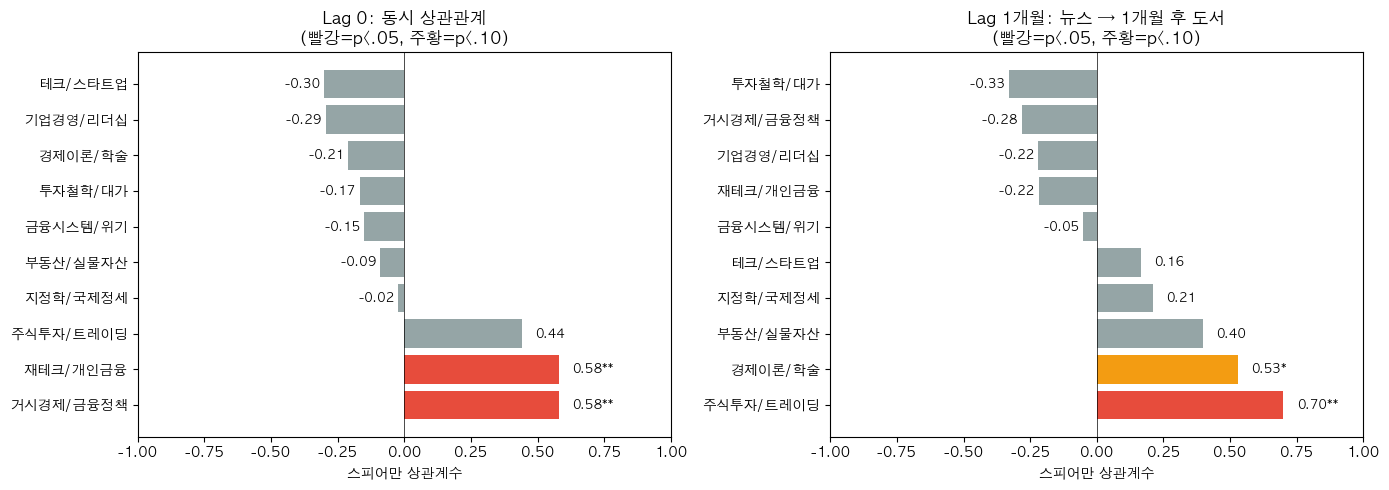

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 동시 상관관계
ax1 = axes[0]
colors = ['#e74c3c' if p < 0.05 else ('#f39c12' if p < 0.1 else '#95a5a6') for p in df_result['p']]
bars = ax1.barh(df_result['카테고리'], df_result['Spearman_r'], color=colors)
ax1.axvline(x=0, color='black', linewidth=0.5)
ax1.set_xlabel('스피어만 상관계수')
ax1.set_title('Lag 0: 동시 상관관계\n(빨강=p<.05, 주황=p<.10)')
ax1.set_xlim(-1, 1)

for bar, r, p in zip(bars, df_result['Spearman_r'], df_result['p']):
    sig = '**' if p < 0.05 else ('*' if p < 0.1 else '')
    ax1.text(r + 0.05 if r >= 0 else r - 0.15, bar.get_y() + bar.get_height()/2, 
             f'{r:.2f}{sig}', va='center', fontsize=9)

# 시차 1개월 상관관계
ax2 = axes[1]
lag1 = df_lag[df_lag['Lag'] == 1].sort_values('r', ascending=False)
colors2 = ['#e74c3c' if p < 0.05 else ('#f39c12' if p < 0.1 else '#95a5a6') for p in lag1['p']]
bars2 = ax2.barh(lag1['카테고리'], lag1['r'], color=colors2)
ax2.axvline(x=0, color='black', linewidth=0.5)
ax2.set_xlabel('스피어만 상관계수')
ax2.set_title('Lag 1개월: 뉴스 → 1개월 후 도서\n(빨강=p<.05, 주황=p<.10)')
ax2.set_xlim(-1, 1)

for bar, r, p in zip(bars2, lag1['r'], lag1['p']):
    sig = '**' if p < 0.05 else ('*' if p < 0.1 else '')
    ax2.text(r + 0.05 if r >= 0 else r - 0.15, bar.get_y() + bar.get_height()/2, 
             f'{r:.2f}{sig}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [8]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 카테고리 리스트
available_categories = common_categories

# 기본 첫 번째 카테고리로 초기 그래프 생성
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("시간별 지수 흐름 (Trend)", "뉴스 바이럴 vs 도서 가중치 (Correlation)"),
    horizontal_spacing=0.15
)

# 버튼 구성을 위한 리스트
buttons = []

for i, cat in enumerate(available_categories):
    # 데이터 준비
    v_data = viral_aligned[cat]
    b_data = bs_aligned[cat]
    months = viral_aligned.index
    
    # 1. 시계열 트레이스 (왼쪽 차트)
    # 뉴스 바이럴 지수
    visible = (i == 0)
    fig.add_trace(go.Scatter(
        x=months, y=v_data, name="뉴스 바이럴",
        line=dict(color='royalblue', width=3),
        visible=visible
    ), row=1, col=1)
    
    # 도서 가중치 점수 (이중 축 대신 정규화 없이 비교하거나 보조축 설정 가능하나 여기선 동일 축 권장)
    fig.add_trace(go.Scatter(
        x=months, y=b_data * (v_data.max()/b_data.max()) if b_data.max() != 0 else b_data, 
        name="도서 가중합(Scale조정)",
        line=dict(color='indianred', width=3, dash='dot'),
        visible=visible
    ), row=1, col=1)
    
    # 2. 산점도 트레이스 (오른쪽 차트)
    fig.add_trace(go.Scatter(
        x=v_data, y=b_data, mode='markers+text',
        text=months.str[-2:] + "월", textposition="top center",
        marker=dict(size=12, color='rgba(135, 206, 250, 0.6)', line=dict(width=1)),
        name=f"{cat} 분포",
        visible=visible
    ), row=1, col=2)

    # 버튼 로직
    # 한 카테고리당 3개의 트레이스(뉴스 선, 도서 선, 산점도)가 있으므로 이를 제어
    vis_list = [False] * (len(available_categories) * 3)
    vis_list[i*3 : i*3+3] = [True, True, True]
    
    buttons.append(dict(
        label=cat,
        method="update",
        args=[{"visible": vis_list},
              {"title": f"<b>[{cat}]</b> 뉴스-도서 상관계수 상세 분석"}]
    ))

# 레이아웃 수정
fig.update_layout(
    updatemenus=[dict(buttons=buttons, direction="down", showactive=True, x=0, y=1.15)],
    title=f"<b>[{available_categories[0]}]</b> 뉴스-도서 상관계수 상세 분석",
    height=500,
    plot_bgcolor='white',
    showlegend=False
)

fig.update_xaxes(title_text="분석 월", row=1, col=1, gridcolor='whitesmoke')
fig.update_yaxes(title_text="지수 점수", row=1, col=1, gridcolor='whitesmoke')
fig.update_xaxes(title_text="뉴스 바이럴 지수", row=1, col=2, gridcolor='whitesmoke')
fig.update_yaxes(title_text="도서 가중합 점수", row=1, col=2, gridcolor='whitesmoke')

fig.show()

In [9]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
from scipy import stats

# 카테고리 리스트
available_categories = common_categories

# 1행 2열 서브플롯 생성
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("시간별 지수 흐름 (Trend)", "상관관계 분포 및 회귀선 (OLS Regression)"),
    horizontal_spacing=0.15
)

buttons = []

for i, cat in enumerate(available_categories):
    # 데이터 준비
    v_data = viral_aligned[cat]
    b_data = bs_aligned[cat]
    months = viral_aligned.index
    
    # --- OLS 회귀선 계산 ---
    # x: 뉴스 바이럴, y: 도서 가중치
    mask = ~np.isnan(v_data) & ~np.isnan(b_data) # 결측치 제외 (혹시 모를 에러 방지)
    slope, intercept, r_value, p_value, std_err = stats.linregress(v_data[mask], b_data[mask])
    
    line_x = np.array([v_data.min(), v_data.max()])
    line_y = slope * line_x + intercept
    # -----------------------

    visible = (i == 0) # 첫 번째 카테고리만 초기값으로 활성화
    
    # 1. 시계열 트레이스 (왼쪽 차트)
    fig.add_trace(go.Scatter(
        x=months, y=v_data, name="뉴스 바이럴",
        line=dict(color='royalblue', width=3),
        visible=visible, showlegend=True if i==0 else False
    ), row=1, col=1)
    
    fig.add_trace(go.Scatter(
        x=months, y=b_data * (v_data.max()/b_data.max()) if b_data.max() != 0 else b_data, 
        name="도서 가중합(Scale)",
        line=dict(color='indianred', width=3, dash='dot'),
        visible=visible, showlegend=True if i==0 else False
    ), row=1, col=1)
    
    # 2. 산점도 트레이스 (오른쪽 차트)
    fig.add_trace(go.Scatter(
        x=v_data, y=b_data, mode='markers+text',
        text=months.str[-2:] + "월", textposition="top center",
        marker=dict(size=12, color='rgba(135, 206, 250, 0.7)', line=dict(width=1, color='DarkSlateGrey')),
        name="데이터 포인트",
        visible=visible, showlegend=False
    ), row=1, col=2)

    # 3. OLS 회귀선 트레이스 (오른쪽 차트)
    fig.add_trace(go.Scatter(
        x=line_x, y=line_y, mode='lines',
        line=dict(color='rgba(255, 0, 0, 0.5)', width=2, dash='dash'),
        name=f"OLS (r={r_value:.2f})",
        hoverinfo='skip', # 회귀선은 툴팁 제외
        visible=visible, showlegend=False
    ), row=1, col=2)

    # 버튼 로직: 한 카테고리당 4개의 트레이스(뉴스선, 도서선, 산점도, 회귀선) 제어
    vis_list = [False] * (len(available_categories) * 4)
    vis_list[i*4 : i*4+4] = [True, True, True, True]
    
    buttons.append(dict(
        label=cat,
        method="update",
        args=[{"visible": vis_list},
              {"title": f"<b>[{cat}]</b> 뉴스-도서 상관분석 (Spearman r: {df_result.loc[df_result['카테고리']==cat, 'Spearman_r'].values[0]:.2f})"}]
    ))

# 레이아웃 최종 설정
fig.update_layout(
    updatemenus=[dict(buttons=buttons, direction="down", showactive=True, x=0, y=1.2)],
    title=f"<b>[{available_categories[0]}]</b> 뉴스-도서 상관분석",
    height=550,
    plot_bgcolor='white',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

fig.update_xaxes(gridcolor='whitesmoke', zerolinecolor='grey', row=1, col=1)
fig.update_yaxes(gridcolor='whitesmoke', zerolinecolor='grey', row=1, col=1)
fig.update_xaxes(title_text="뉴스 바이럴", gridcolor='whitesmoke', zerolinecolor='grey', row=1, col=2)
fig.update_yaxes(title_text="도서 가중합", gridcolor='whitesmoke', zerolinecolor='grey', row=1, col=2)

fig.show()

## 5. 주요 발견 및 해석

### 핵심 발견

#### 1. 주식투자/트레이딩: 1개월 시차에서 강한 양의 상관 (r=+0.700, p=0.017)

- **해석**: 주식 관련 뉴스의 바이럴 지수가 높은 달로부터 **1개월 후**, 주식투자 관련 도서가 베스트셀러 상위권에 더 많이 진입
- **메커니즘 추정**: 
  - 뉴스에서 주식 이슈가 화제 → 관심 증가 → 관련 도서 탐색 → 구매 (1개월 소요)
  - 출판사의 마케팅 반응 시간 반영 가능

#### 2. 거시경제/금융정책: 동시 반응 (r=+0.580, p=0.048)

- **해석**: 금리, 환율, 통화정책 관련 뉴스 바이럴과 관련 도서 베스트셀러가 **같은 달**에 함께 움직임
- **메커니즘 추정**:
  - 금리 인상/인하, 환율 급변 등 거시경제 이슈는 즉각적 관심 유발
  - 이미 출간된 관련 도서의 판매가 즉시 증가

#### 3. 재테크/개인금융: 동시 반응 (r=+0.580, p=0.048)

- **해석**: 재테크 관련 뉴스 바이럴과 관련 도서 베스트셀러가 **같은 달**에 함께 움직임
- **메커니즘 추정**:
  - 연말정산, 세금, 노후준비 등 시즌성 이슈가 뉴스와 도서 구매에 동시 영향

#### 4. 경제이론/학술: 1개월 시차에서 경향성 (r=+0.528, p=0.095)

- **해석**: 경제이론 관련 뉴스 → 1개월 후 관련 도서 증가 경향
- 통계적으로 유의하진 않지만 (p=0.095), 경향성 존재

### 유의하지 않은 카테고리 해석

| 카테고리 | 최고 r | 해석 |
|---------|-------|------|
| 테크/스타트업 | +0.164 | 뉴스와 도서 구매가 독립적으로 움직임. 기술 트렌드는 도서보다 온라인 콘텐츠로 학습? |
| 지정학/국제정세 | +0.210 | 뉴스는 많지만 도서 구매로 이어지지 않음. 뉴스 소비로 충분? |
| 기업경영/리더십 | +0.236 | 경영 도서는 뉴스 트렌드와 무관하게 꾸준히 소비되는 스테디셀러 성격 |
| 부동산/실물자산 | +0.397 | 경향성은 있으나 유의하지 않음 (p=0.23). 데이터 추가 시 유의해질 가능성 |
| 투자철학/대가 | +0.151 | 버핏, 린치 등 대가 관련 도서는 트렌드와 무관하게 꾸준히 소비 |

### 역행 패턴 (음의 상관 경향)

| 카테고리 | 시차 | r | p | 해석 |
|---------|------|-----|-----|------|
| 기업경영/리더십 | 3개월 | -0.567 | 0.112 | 경영 뉴스 ↑ → 3개월 후 경영 도서 ↓? |
| 주식투자/트레이딩 | 3개월 | -0.433 | 0.244 | 단기 반응(+) 후 장기 반동(-)? |

> 통계적으로 유의하지 않아 해석에 주의 필요

## 6. 결론

### 가설 검증 결과

**가설**: "경영/경제 분야 도서의 구매는 뉴스 트렌드 변화에 민감하다"

**결과**: ✅ **부분적으로 지지됨**

- 10개 카테고리 중 **3~4개**에서 유의한 상관관계 발견
- 특히 **주식투자/트레이딩** 카테고리에서 강한 상관 (r=0.70, 1개월 시차)
- **거시경제/금융정책**, **재테크/개인금융**은 동시 반응

### 실무적 시사점

1. **주식투자 도서 마케팅**: 주식 관련 뉴스가 급증한 달의 **다음 달**에 마케팅 강화
2. **거시경제/재테크 도서**: 관련 뉴스 이슈 발생 시 **즉각적** 프로모션 효과적
3. **테크/경영 도서**: 뉴스 트렌드보다는 다른 마케팅 전략 필요

### 한계점

| 한계 | 설명 |
|------|------|
| 표본 크기 | 12개월 (n이 작아 통계적 검증력 제한) |
| 단일 매체 | 한국경제 뉴스만 분석 |
| 단일 서점 | 교보문고 베스트셀러만 분석 |
| 인과관계 | 상관관계 ≠ 인과관계 (제3변수 가능성) |

### 향후 연구 제안

1. 분석 기간 확대 (2~3년 데이터)
2. 다수 매체 뉴스 데이터 추가
3. 다수 서점 베스트셀러 데이터 추가
4. 주간 단위 분석으로 시차 정밀화

In [10]:
# 결과 저장
df_result.to_csv('correlation_results_v3.csv', index=False, encoding='utf-8-sig')
df_lag.to_csv('lag_analysis_v3.csv', index=False, encoding='utf-8-sig')
print("결과 저장 완료: correlation_results_v3.csv, lag_analysis_v3.csv")

결과 저장 완료: correlation_results_v3.csv, lag_analysis_v3.csv
